In [1]:
options(repr.plot.width=15, repr.plot.height=5)
library(ggplot2)
library(dplyr)
library(Seurat)
library(viridis)

library("RColorBrewer")
source("../Scripts/plot.R")
source("../Scripts/functions.R")
source("../Scripts/umaps.r")
output <- "../Results/"
methods <- c("Seurat",  "SingleR","CellID", "SCN", "ItClust")

set = "PBMC"
datafolder="../Data/fulldata/"
reference_name = "PBMC10x"
sizes = c(38, 100)
accuracy_file <- paste0(output, "accuracies_",set,".csv")
umap_file <- paste0(output, "umap_",set,".csv")
metadata_file <- paste0(datafolder,set,"_Query/meta.csv")
expressiondata_file <- paste0(datafolder,set,"_Query/data.csv")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: viridisLite



In [2]:
meta <- read.csv("../Data/fulldata/PBMC_Query/meta.csv")
celltypes <-names(sort(table(meta$class_)))


In [3]:
celltypes

[1] "Plasmacytoid dendritic cell" "Megakaryocyte"              
[3] "Dendritic cell"              "CD16+ monocyte"             
[5] "Natural killer cell"         "CD14+ monocyte"             
[7] "Cytotoxic T cell"            "B cell"                     
[9] "CD4+ T cell"

In [4]:
get_percentage_predictions <- function(predictions,version, method, size){
   
    set <- paste(sep="_", version, method, size)
    name <- paste(sep="_", version, size, method)
    cols <- colnames(predictions[, stringr::str_detect(colnames(predictions), set)])
 
    nrSets <- length(predictions[, stringr::str_detect(colnames(predictions), set)])
    #predictions[, name] <- rowSums(predictions[ , stringr::str_detect(colnames(predictions), set)])
    predictions[, paste(sep="_",name, "bootstrap")] <- (apply(predictions[, stringr::str_detect(colnames(predictions), set)], 1,
                                                              function(x) names(table(x))[which.max(table(x))]))
    predictions[, paste(sep="_", "confidence",name)] <- (apply(predictions[, stringr::str_detect(colnames(predictions), set)], 1,
                                                               function(x) max(table(x)))) / nrSets
    summary = (apply(predictions[, stringr::str_detect(colnames(predictions), set)], 2, function(x) x == predictions$class_))
  
    predictions[, name] = apply(summary, 1, function(x)length(x[x == "TRUE"]))                        
    predictions <- predictions[,!colnames(predictions) %in% cols]                       
    remove(summary)                           
                            
    predictions[, name] <- (predictions[, name] * 100) / nrSets
    predictions[is.na(predictions[,name]), name ] <- 0 

    return(predictions)
}


translate <- function(col){
  
    col[col == "B"] <- "B cell"
    col[col == "Cytotoxic T"] <- "Cytotoxic T cell"
    col[col == "CD4+ T"] <- "CD4+ T cell"
    col[col == "Dendritic"] <- "Dendritic cell"
    col[col == "Natural killer"] <- "Natural killer cell"
    col[col == "Plasmacytoid dendritic"] <- "Plasmacytoid dendritic cell"
    return(col)
}     

umap <- getUMAPfile(umap_file)
meta <- read.csv(metadata_file)
umap <- merge(umap, meta, by=c("id"),all = F)
remove(meta)
rownames(umap) <- umap$id
umap <- umap[!is.na(umap$class_),]

cols <- colnames(umap)[stringr::str_detect(colnames(umap), "ItClust")]                        
x<- do.call(cbind,lapply(cols, function(col) translate(umap[,col])))
colnames(x) <- cols  
umap <- umap[,!(colnames(umap) %in% cols)]
umap <- cbind(x,umap)

for(method in methods){ 
    for(size in sizes) {
            for (name in reference_name) umap <- get_percentage_predictions(umap,name, method, size)}}
 
    
umap <- prepare_umap(file = expressiondata_file, meta_data = umap, split = "Method")#
umap@meta.data$full_Seurat  <- umap@meta.data$PBMC10x_Seurat_3090_0 == umap@meta.data$class_
umap@meta.data$full_CellID  <- umap@meta.data$PBMC10x_CellID_3090_0 == umap@meta.data$class_
umap@meta.data$full_SCN     <- umap@meta.data$PBMC10x_SCN_3090_0 == umap@meta.data$class_
umap@meta.data$full_ItClust <- umap@meta.data$PBMC10x_ItClust_3090_0 == umap@meta.data$class_
umap@meta.data$full_SingleR <- umap@meta.data$PBMC10x_SingleR_3090_0 == umap@meta.data$class_
head(umap@meta.data)                             

Warning message in data.table::fread(data, sep = ",", verbose = F):
“Detected 10910 column names but the data has 10911 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”
Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”


orig.ident nCount_RNA  nFeature_RNA
pbmc2_10X_V2_AAACCTGAGATGGGTC pbmc2      -65.4462563 206         
pbmc2_10X_V2_AAACCTGAGCGTAATA pbmc2      -84.2118983 179         
pbmc2_10X_V2_AAACCTGAGCTAGGCA pbmc2      -66.2247320 191         
pbmc2_10X_V2_AAACCTGAGGGTCTCC pbmc2       -8.5970251 233         
pbmc2_10X_V2_AAACCTGGTCCGAACC pbmc2       -0.4765493 246         
pbmc2_10X_V2_AAACCTGTCGTCCGTT pbmc2      -54.9338960 202         
                              PBMC10x_ItClust_3090_0
pbmc2_10X_V2_AAACCTGAGATGGGTC B cell                
pbmc2_10X_V2_AAACCTGAGCGTAATA B cell                
pbmc2_10X_V2_AAACCTGAGCTAGGCA Cytotoxic T cell      
pbmc2_10X_V2_AAACCTGAGGGTCTCC CD14+ monocyte        
pbmc2_10X_V2_AAACCTGGTCCGAACC Cytotoxic T cell      
pbmc2_10X_V2_AAACCTGTCGTCCGTT Cytotoxic T cell      
                              id                           
pbmc2_10X_V2_AAACCTGAGATGGGTC pbmc2_10X_V2_AAACCTGAGATGGGTC
pbmc2_10X_V2_AAACCTGAGCGTAATA pbmc2_10X_V2_AAACCTGAGCGTAATA
pbmc2_10X_V2_AAACCTGAGCTAGGCA pbmc2_10X_V2_AAACCTGAGCTAGGCA
pbmc2_10X_V2_AAACCTGAGGGTCTCC pbmc2_10X_V2_AAACCTGAGGGTCTCC
pbmc2_10X_V2_AAACCTGGTCCGAACC pbmc2_10X_V2_AAACCTGGTCCGAACC
pbmc2_10X_V2_AAACCTGTCGTCCGTT pbmc2_10X_V2_AAACCTGTCGTCCGTT
                              PBMC10x_Seurat_3090_0 PBMC10x_SCN_3090_0
pbmc2_10X_V2_AAACCTGAGATGGGTC B cell                B cell            
pbmc2_10X_V2_AAACCTGAGCGTAATA B cell                B cell            
pbmc2_10X_V2_AAACCTGAGCTAGGCA Natural killer cell   Cytotoxic T cell  
pbmc2_10X_V2_AAACCTGAGGGTCTCC CD14+ monocyte        CD14+ monocyte    
pbmc2_10X_V2_AAACCTGGTCCGAACC Cytotoxic T cell      CD4+ T cell       
pbmc2_10X_V2_AAACCTGTCGTCCGTT CD4+ T cell           CD4+ T cell       
                              PBMC10x_CellID_3090_0 PBMC10x_SingleR_3090_0
pbmc2_10X_V2_AAACCTGAGATGGGTC B cell                B cell                
pbmc2_10X_V2_AAACCTGAGCGTAATA B cell                B cell                
pbmc2_10X_V2_AAACCTGAGCTAGGCA Natural killer cell   Natural killer cell   
pbmc2_10X_V2_AAACCTGAGGGTCTCC CD14+ monocyte        Dendritic cell        
pbmc2_10X_V2_AAACCTGGTCCGAACC CD4+ T cell           CD4+ T cell           
pbmc2_10X_V2_AAACCTGTCGTCCGTT Cytotoxic T cell      CD4+ T cell           
                              nGene ⋯ confidence_PBMC10x_38_ItClust
pbmc2_10X_V2_AAACCTGAGATGGGTC 1044  ⋯ 0.9325153                    
pbmc2_10X_V2_AAACCTGAGCGTAATA  803  ⋯ 0.8220859                    
pbmc2_10X_V2_AAACCTGAGCTAGGCA 1372  ⋯ 0.8895706                    
pbmc2_10X_V2_AAACCTGAGGGTCTCC 1519  ⋯ 0.9079755                    
pbmc2_10X_V2_AAACCTGGTCCGAACC 1451  ⋯ 0.5030675                    
pbmc2_10X_V2_AAACCTGTCGTCCGTT  931  ⋯ 0.8711656                    
                              PBMC10x_38_ItClust PBMC10x_100_ItClust_bootstrap
pbmc2_10X_V2_AAACCTGAGATGGGTC 93.25153           B cell                       
pbmc2_10X_V2_AAACCTGAGCGTAATA 82.20859           B cell                       
pbmc2_10X_V2_AAACCTGAGCTAGGCA 88.95706           Cytotoxic T cell             
pbmc2_10X_V2_AAACCTGAGGGTCTCC 90.79755           Dendritic cell               
pbmc2_10X_V2_AAACCTGGTCCGAACC 50.30675           Natural killer cell          
pbmc2_10X_V2_AAACCTGTCGTCCGTT 87.11656           CD4+ T cell                  
                              confidence_PBMC10x_100_ItClust
pbmc2_10X_V2_AAACCTGAGATGGGTC 1.0000000                     
pbmc2_10X_V2_AAACCTGAGCGTAATA 1.0000000                     
pbmc2_10X_V2_AAACCTGAGCTAGGCA 0.9631902                     
pbmc2_10X_V2_AAACCTGAGGGTCTCC 1.0000000                     
pbmc2_10X_V2_AAACCTGGTCCGAACC 0.4539877                     
pbmc2_10X_V2_AAACCTGTCGTCCGTT 1.0000000                     
                              PBMC10x_100_ItClust full_Seurat full_CellID
pbmc2_10X_V2_AAACCTGAGATGGGTC 100.00000            TRUE        TRUE      
pbmc2_10X_V2_AAACCTGAGCGTAATA 100.00000            TRUE        TRUE      
pbmc2_10X_V2_AAACCTGAGCTAGGCA  96.31902           FALSE       FALSE      
pbm

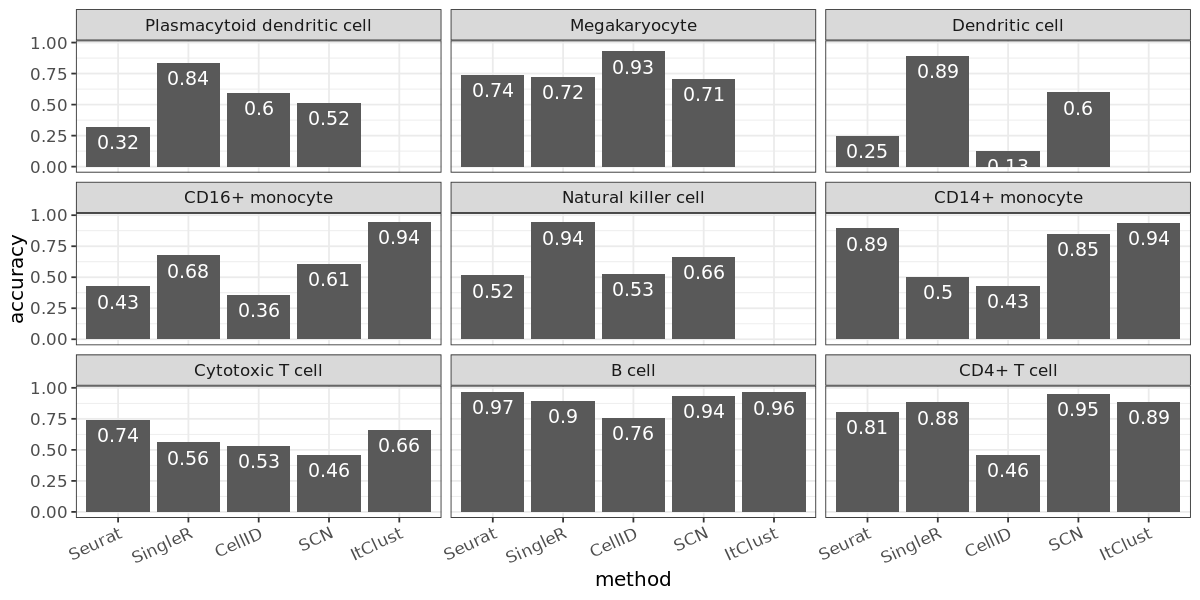

In [36]:

getAccuracy <- function(data, type=NULL, label="class_", id="full"){

    if(!is.null(type)) data <- data[data[,label] == type,]

    x <- (data[, stringr::str_detect(colnames(data), id)])

    pred <- apply(x, 2, function(i) calcAccuracy(i) )
    return(pred)            

}
  
calcAccuracy <- function(col){
    pred <- table(col)
    if("TRUE" %in% names(pred))  accuracy <- pred["TRUE"] / length(col)
    else accuracy <- 0
    return( accuracy)
}
accuracy <-  do.call(rbind,lapply(celltypes, function(type) getAccuracy(umap@meta.data, type=type, id="full")))
rownames(accuracy) <- celltypes
accuracy <- reshape2::melt(accuracy)
colnames(accuracy) <- c("celltype", "method", "accuracy")
accuracy$method <- stringr::str_replace(accuracy$method, "full_","")

                                  options(repr.plot.width=10, repr.plot.height=5)
accuracies_full <- ggplot(accuracy, aes(method, accuracy))+
theme_bw() + geom_bar(stat="identity",position=position_dodge())+
geom_text(aes(label=round(accuracy,2)), vjust=1.6, color="white",
            position = position_dodge(0.9), size=4)+ facet_wrap(facets = vars(celltype), as.table = T)+
 
theme(plot.title = element_text(size=12),
      axis.text=element_text(size=10),
      axis.text.x=element_text(size=10, angle = 25, hjust = 1),
      axis.title=element_text(size=12),
      strip.text = element_text(size=10))+
scale_x_discrete(limits = methods)
accuracies_full

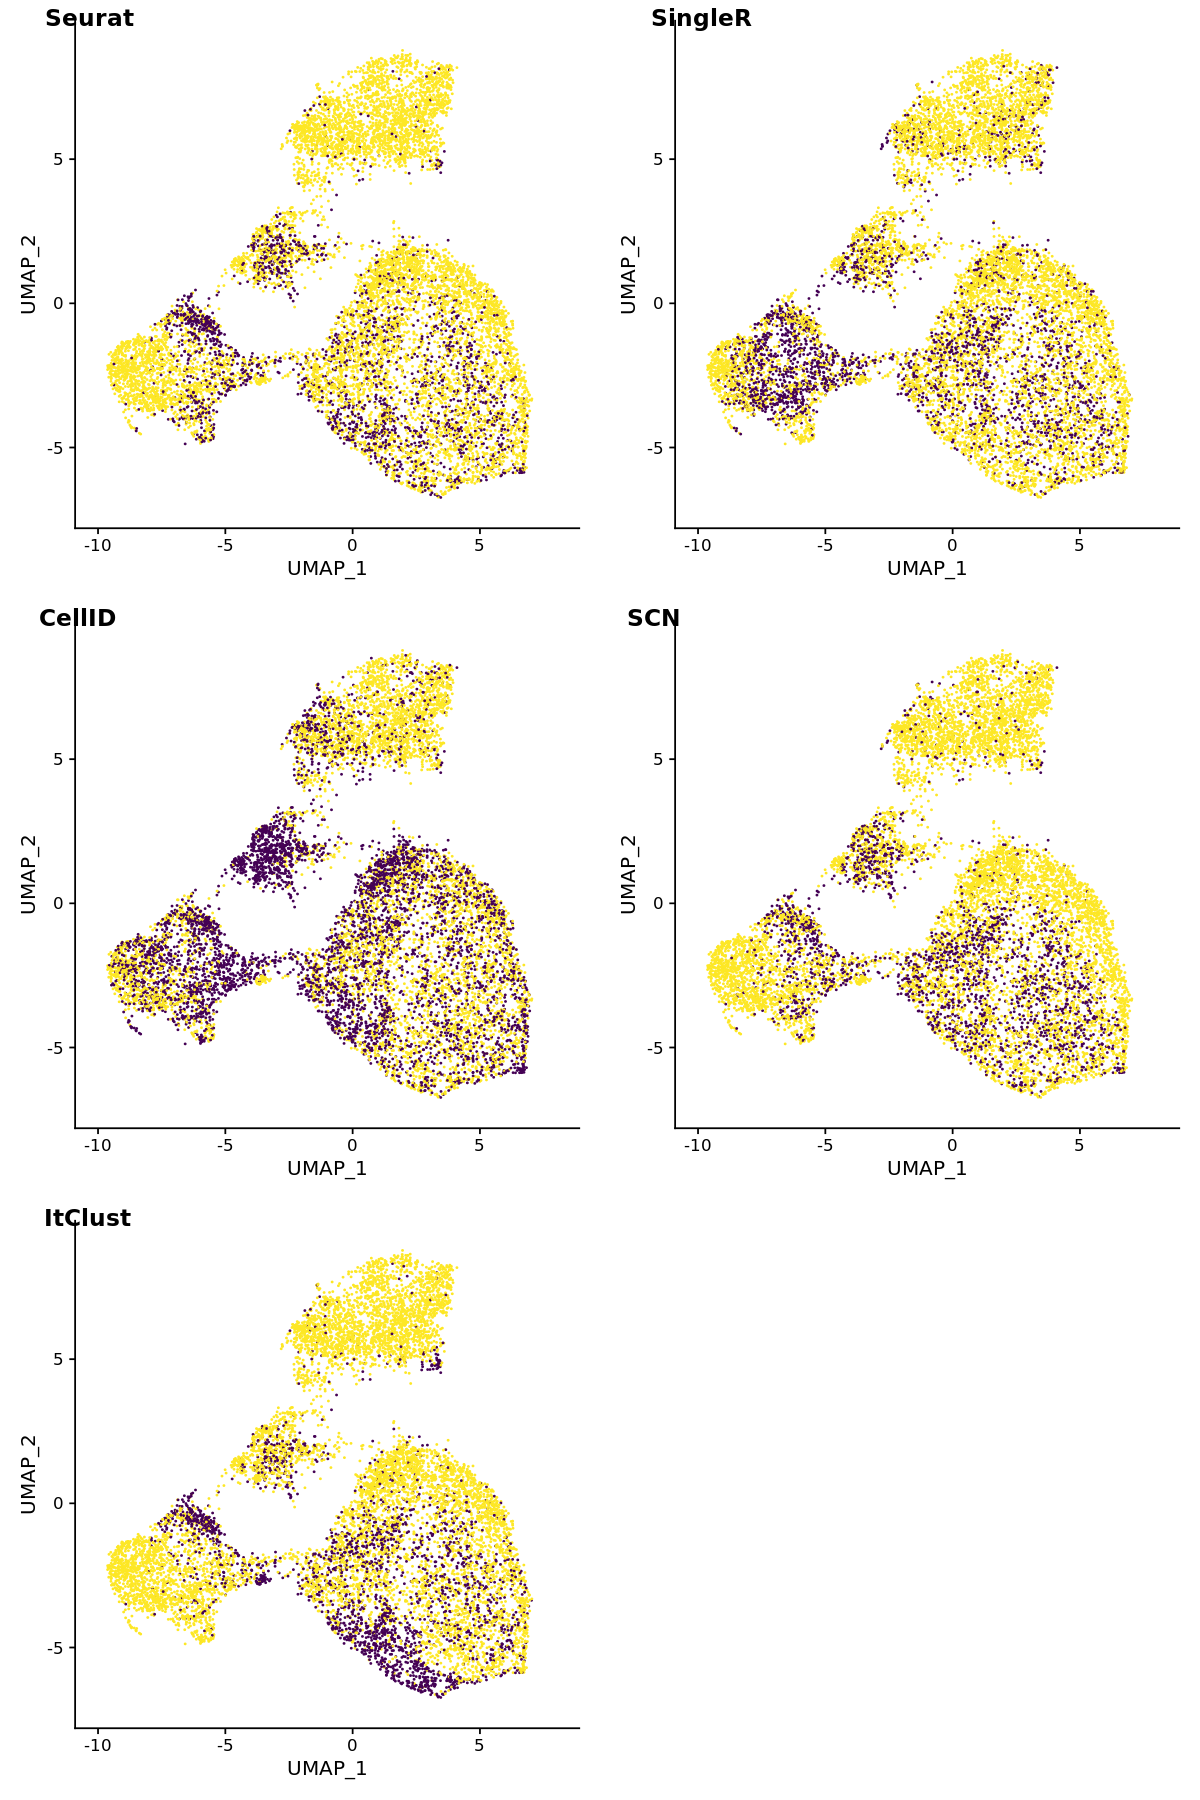

In [6]:

balanced_list <-lapply(methods[methods != "MLP"], function(method) plot_features(data=umap, method=method,cells=NULL,
                                                          # names = c("Biggest balanced sets", "100 cells per celltype", "3000 cells per celltype"),
                                                         sets=c("full_"), legend=T))
options(repr.plot.width=10, repr.plot.height=15)  

f2c <- ggpubr::ggarrange(plotlist = balanced_list,labels=methods, font.label = list(size =14),
                         common.legend = F, legend = "none", ncol=2, nrow=3)
                       f2c

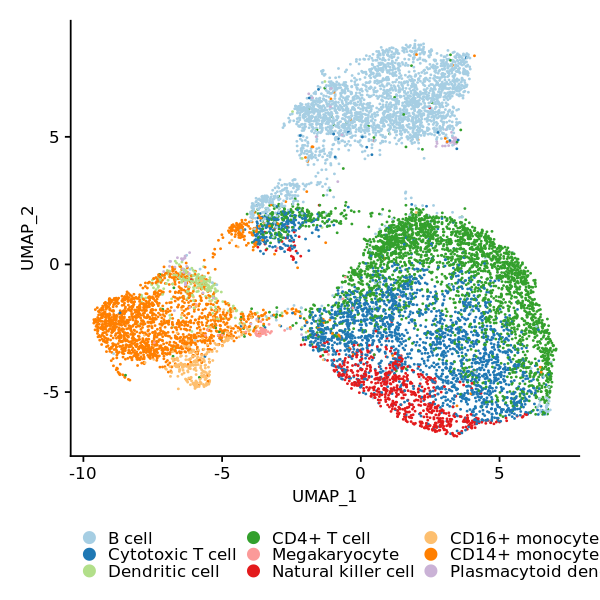

In [7]:
colors <-brewer.pal(length(unique(umap@meta.data$class_)), "Paired")
names(colors) <- unique(umap@meta.data$class_)

#"alphabet", "alphabet2", "glasbey", "polychrome", and "stepped"

plot_celltypes = plot_umap(umap, c("class_"),NULL,
                           colors,
                           1,1, legend_ncol = 3)
options(repr.plot.width=5, repr.plot.height=5)
plot_celltypes[[1]]

[1] 5

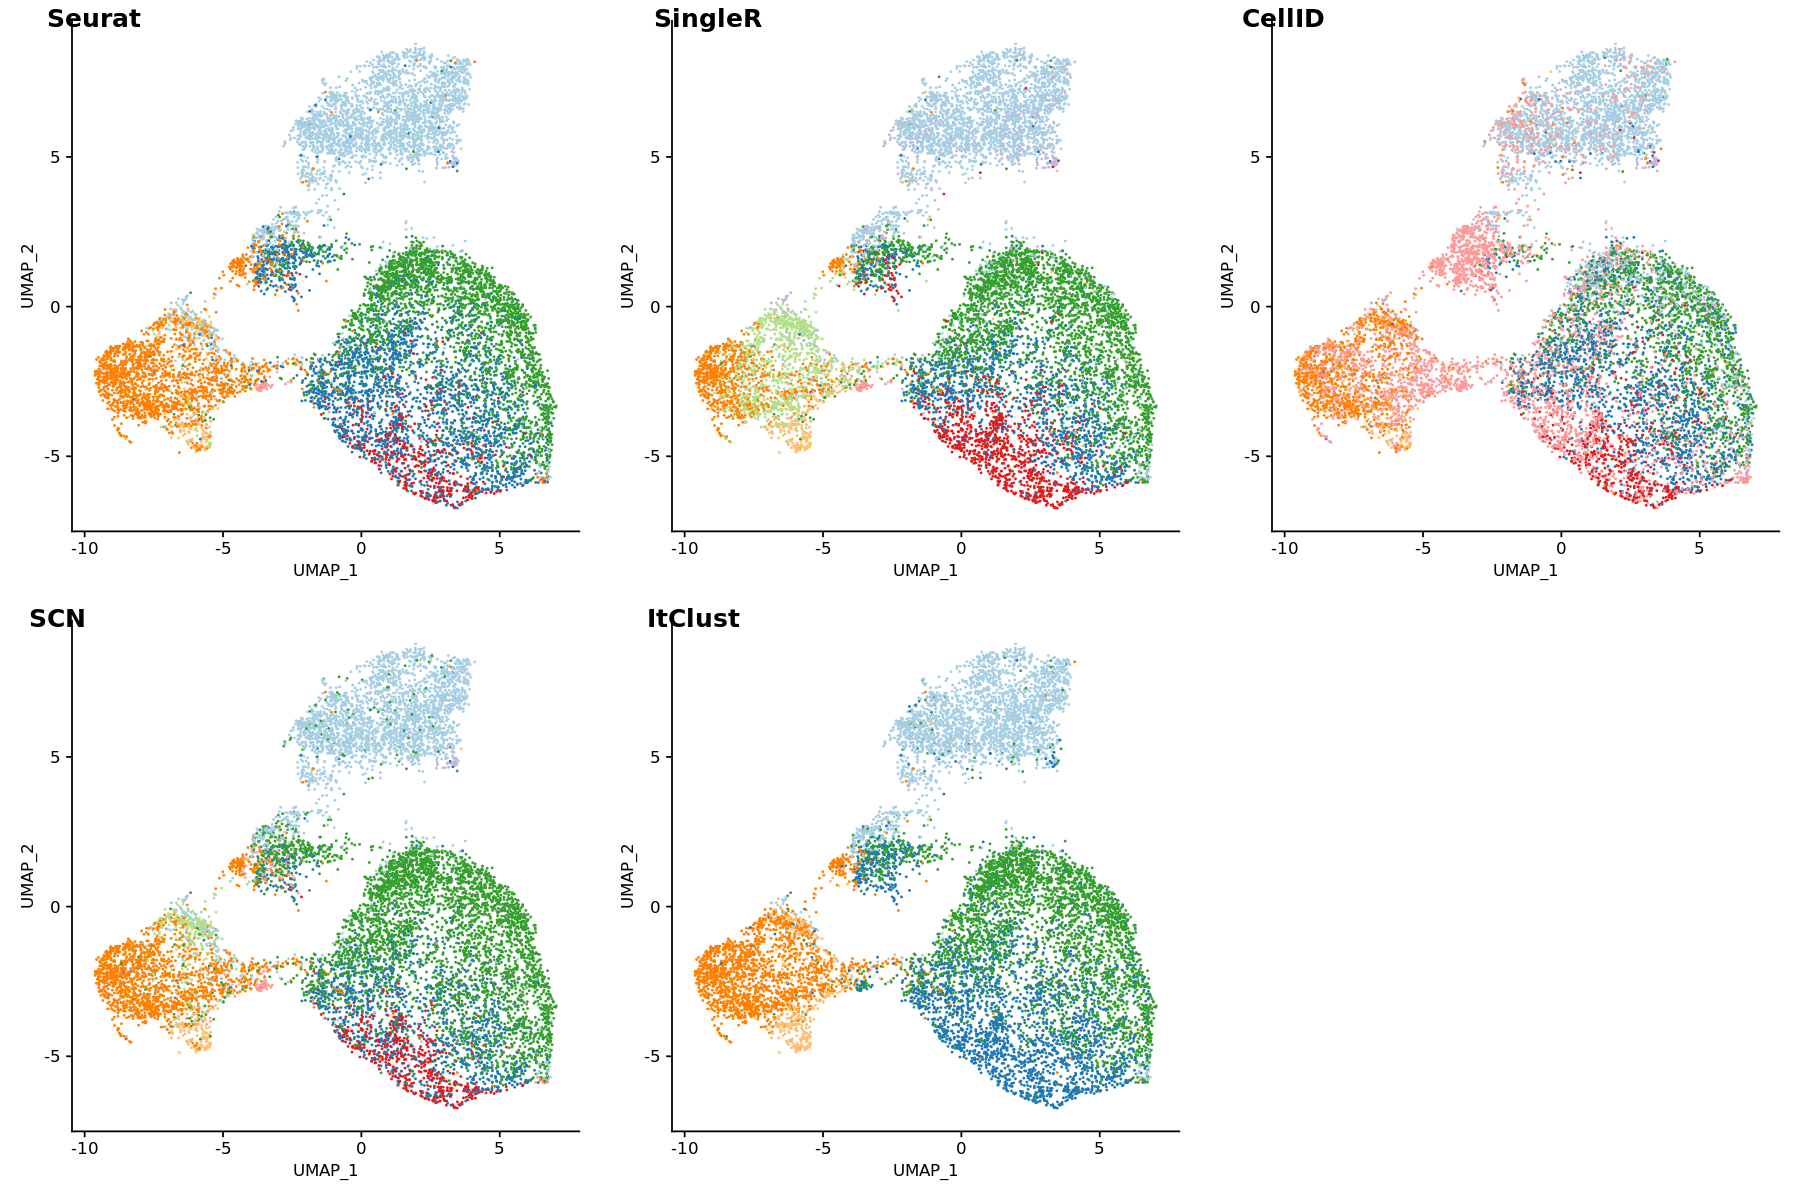

In [8]:
umap@meta.data$PBMC10x_SCN_3090_0[umap@meta.data$PBMC10x_CellID_3090_0 == "unassigned"] <- NA
plots_full <- plot_umap(umap, c(paste0("PBMC10x_",methods[methods != "MLP"], "_3090_0")),NULL,
                           color=colors,
                           1,1, legend_ncol = 5) 
options(repr.plot.width=15, repr.plot.height=10)  
length(plots_full)
f1c <- ggpubr::ggarrange(plotlist = plots_full,labels=methods, font.label = list(size = 15),
                         common.legend = F, legend = "none", ncol=3, nrow=2)
f1c


Using id as id variables

Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“position_dodge requires non-overlapping x intervals”
Warning message:
“position_dodge requires non-overlapping x intervals”
Warning message:
“position_dodge requires non-overlapping x intervals”
Warning message:
“position_dodge requires non-overlapping x intervals”
Warning message:
“position_dodge requires non-overlapping x intervals”
Warning message:
“position_dodge requires non-overlapping x intervals”
Warning message:
“position_dodge requires non-overlapping x intervals”
Warning message:
“position_dodge requires non-overlapping x intervals”
Warning message:
“position_dodge requires non-overlapping x intervals”


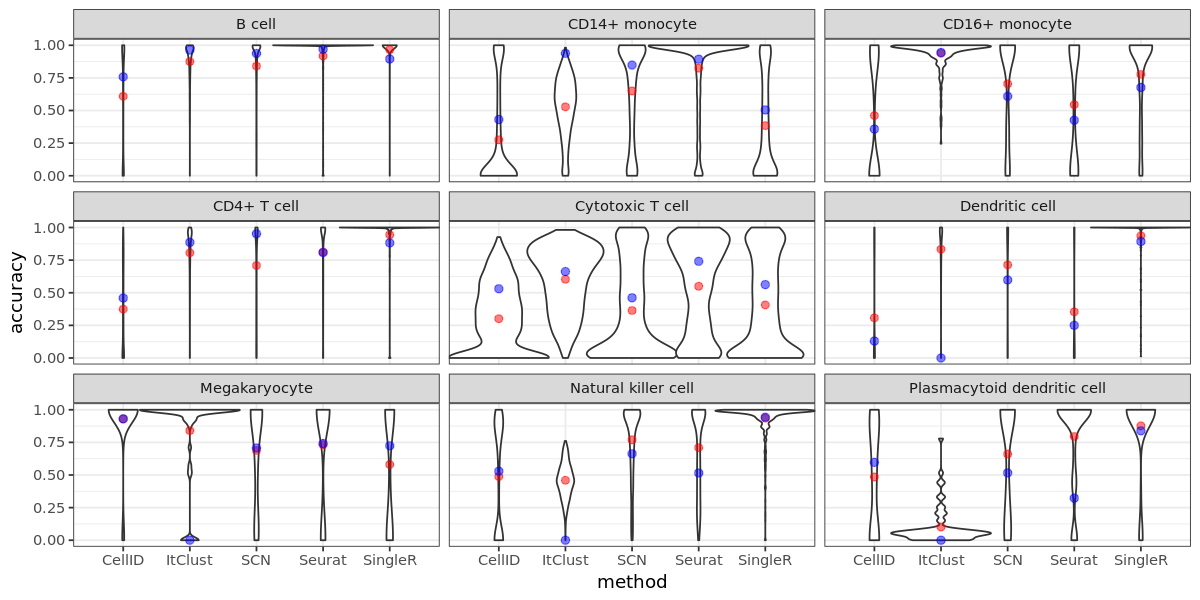

In [9]:

x <- umap@meta.data[, stringr::str_detect(colnames(umap@meta.data), "PBMC10x_38_")]
x <- x[, stringr::str_detect(colnames(x), "confidence", negate = T)]
x <- x[, stringr::str_detect(colnames(x), "bootstrap", negate = T)]
x$id <- umap@meta.data$class_
x <- reshape2::melt(x)

colnames(x) <- c("celltype","method", "accuracy")
x$method <- stringr::str_replace(x$method,"PBMC10x_38_", "")
x$accuracy <- x$accuracy / 100

options(repr.plot.width=10, repr.plot.height=5)
ggplot(x, aes(method, accuracy)) + geom_violin(width=1.5) +  
stat_summary(fun.y=mean, geom="point", shape=20, size=3, color="red", fill="red", alpha=0.5) +
theme_bw()+ facet_wrap(facets = vars(celltype)) +geom_point(data=accuracy, size=2, color="blue", alpha=0.5)
#rownames(accuracy) <- celltypes
#accuracy <- reshape2::melt(accuracy)
#colnames(accuracy) <- c("celltype", "method", "accuracy")
#accuracy$method <- stringr::str_replace(accuracy$method, "full_","")


#accuracies_full <- ggplot(accuracy, aes(method, accuracy))+
#theme_bw() + geom_bar(stat="identity",position=position_dodge())+
#geom_text(aes(label=round(accuracy,2)), vjust=1.6, color="white",
 #           position = position_dodge(0.9), size=4)+ facet_wrap(facets = vars(celltype), as.table = T)+
 
#theme(plot.title = element_text(size=12),
#      axis.text=element_text(size=10),
#      axis.text.x=element_text(size=10, angle = 25, hjust = 1),
#      axis.title=element_text(size=12),
#      strip.text = element_text(size=10))+
#scale_x_discrete(limits = methods)
#accuracies_full

[1] 5

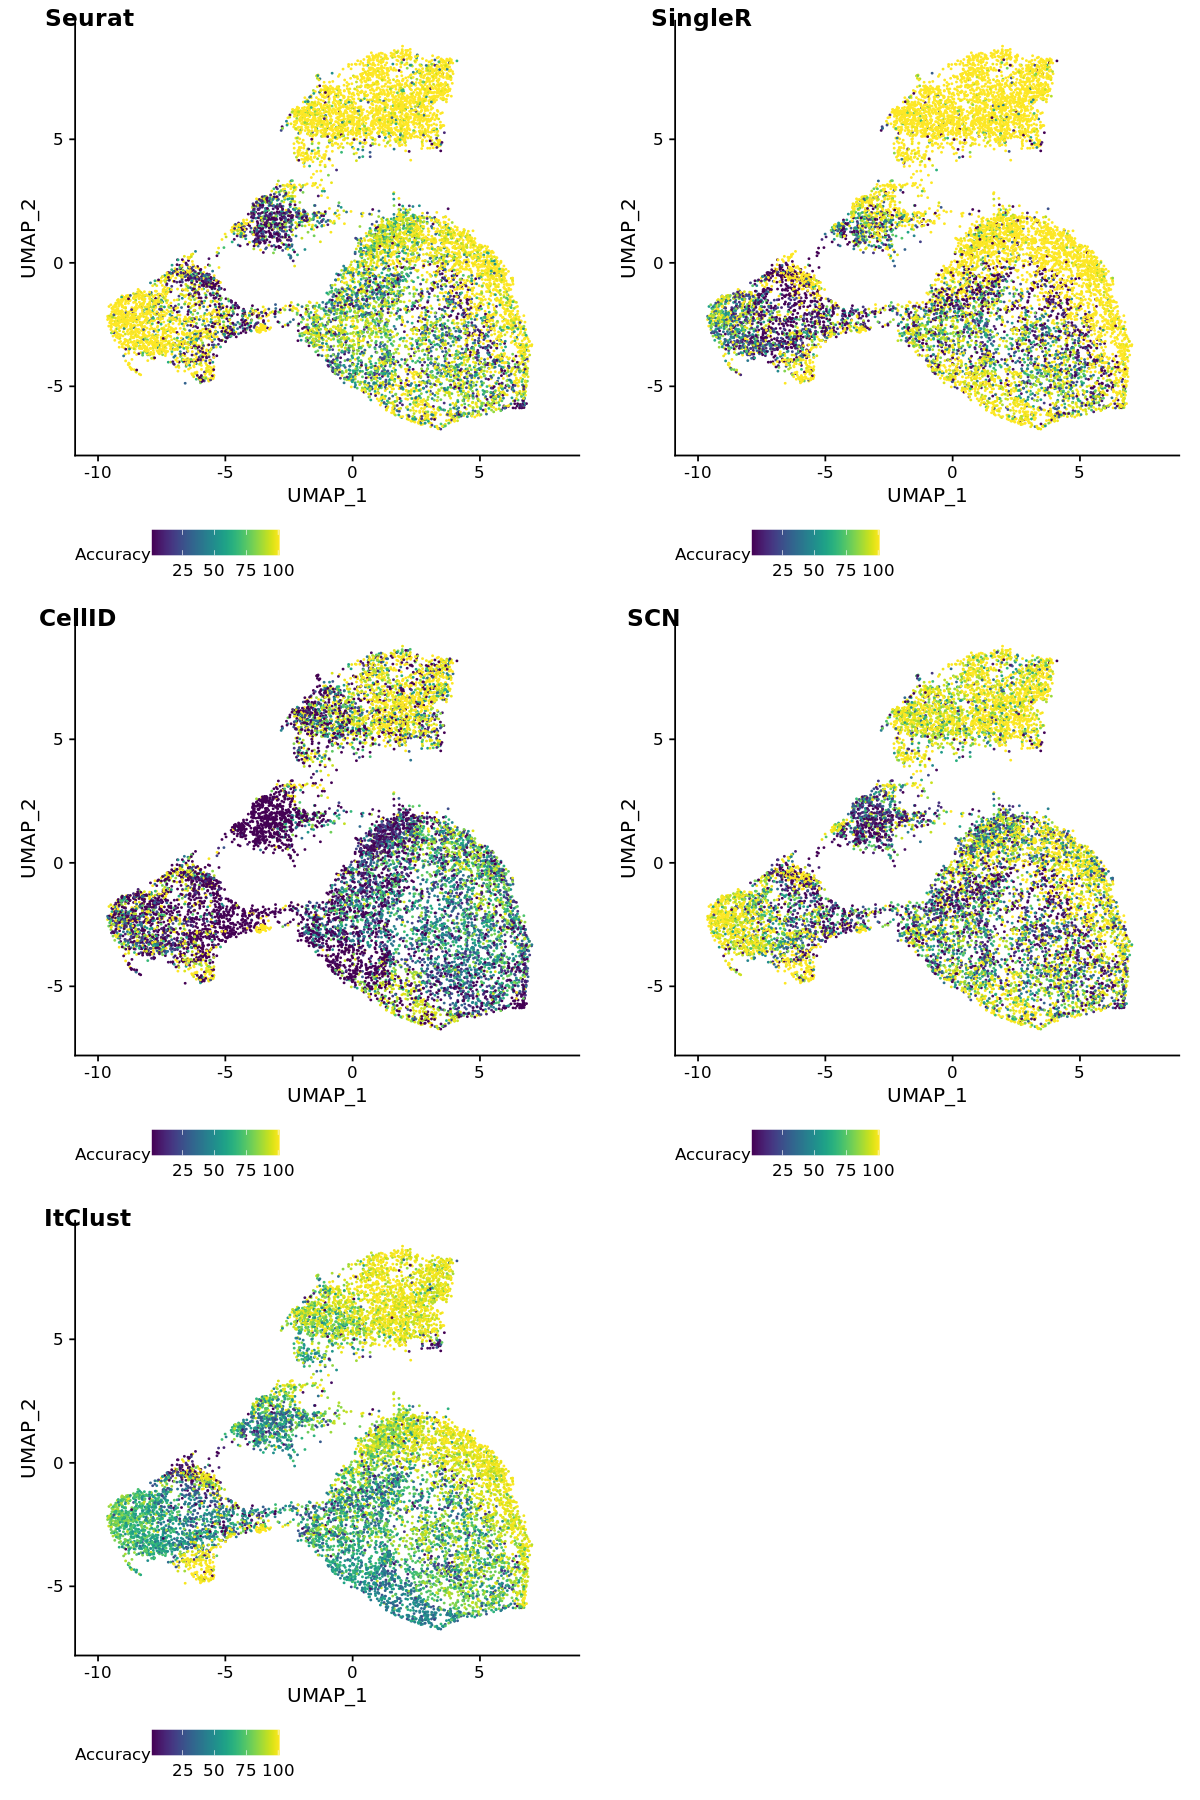

In [10]:


balanced_list <-lapply(methods[methods != "MLP"], function(method) plot_features(data=umap, method=method,cells=NULL,
                                                          # names = c("Biggest balanced sets", "100 cells per celltype", "3000 cells per celltype"),
                                                         sets=c("PBMC10x_38_"), legend=T))
options(repr.plot.width=10, repr.plot.height=15)  
length(plots_full)
f2c <- ggpubr::ggarrange(plotlist = balanced_list,labels=methods, font.label = list(size =14),
                         common.legend = F, legend = "bottom", ncol=2, nrow=3)
                       f2c

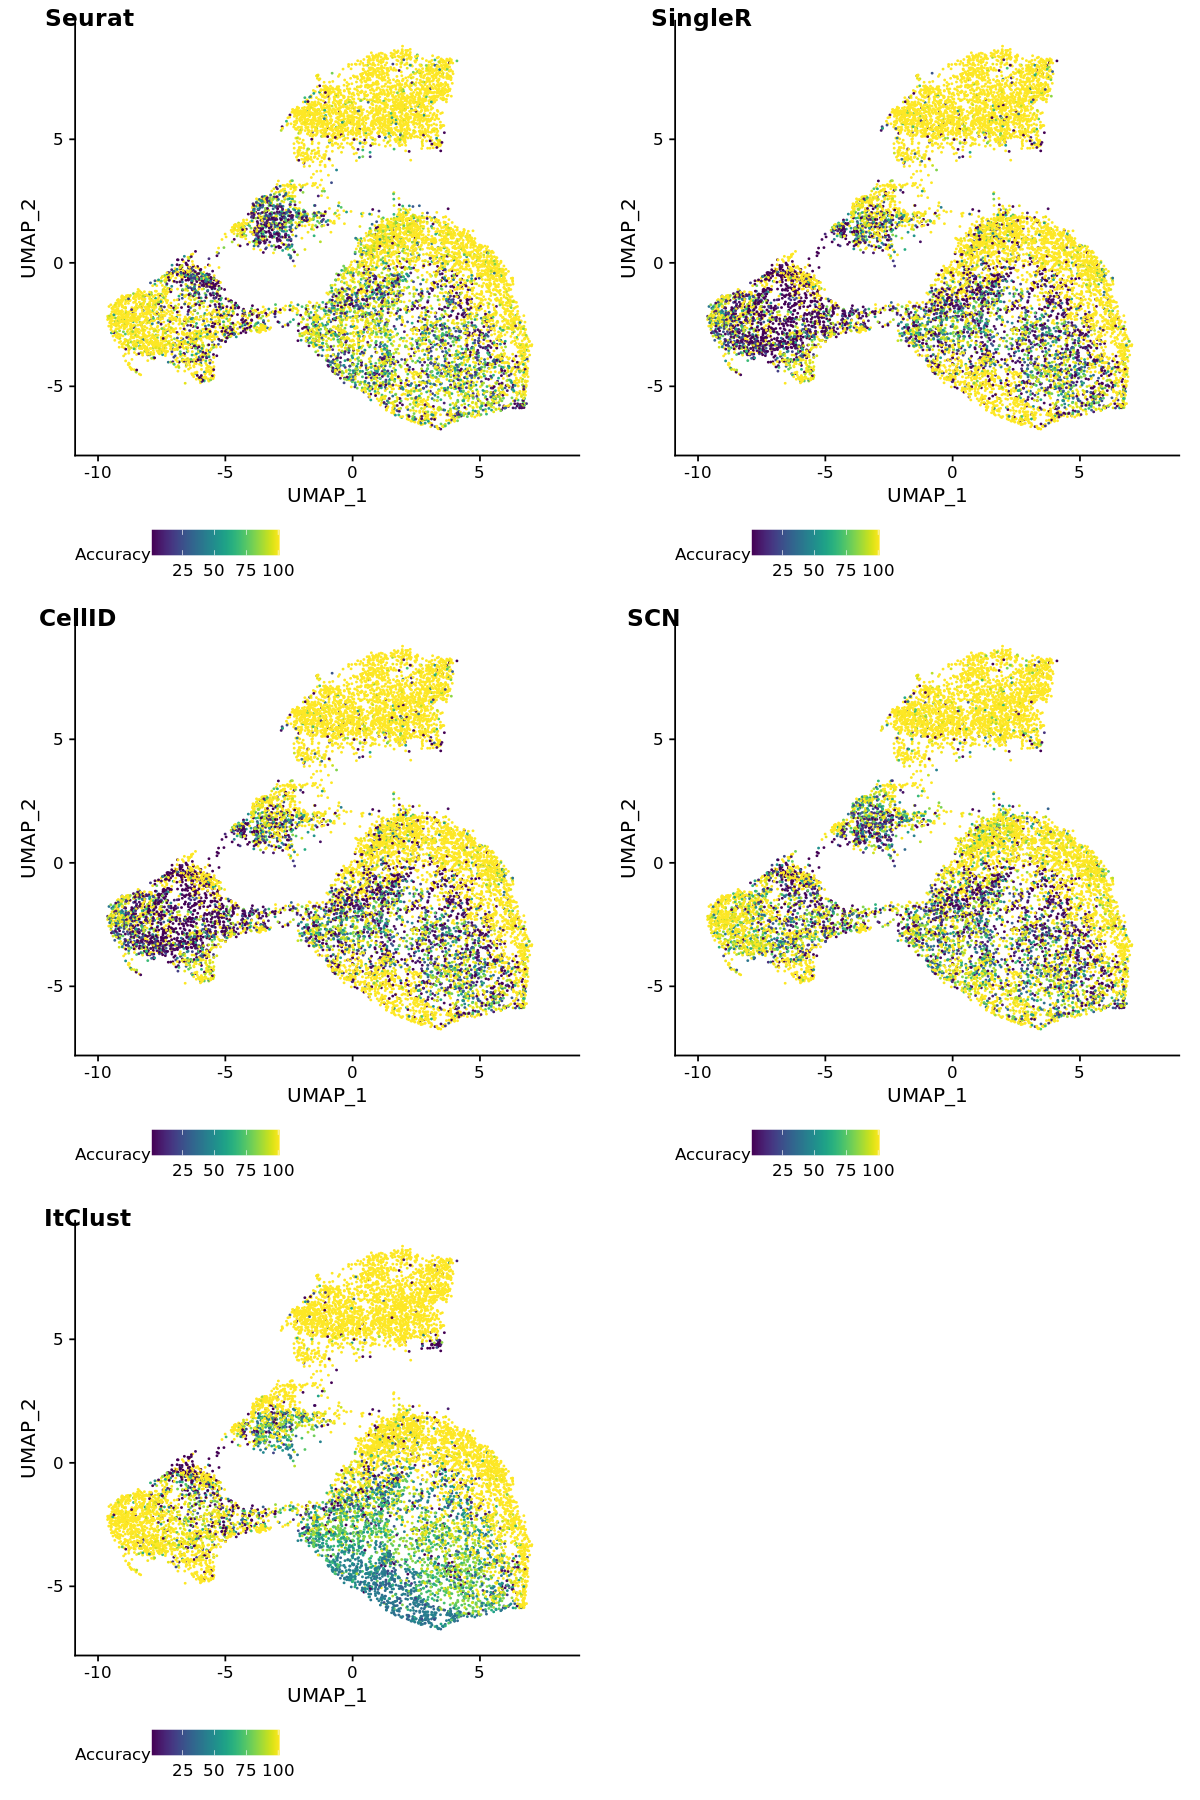

In [11]:
balanced_list <-lapply(methods[methods != "MLP"], function(method) plot_features(data=umap, method=method,cells=NULL,
                                                          # names = c("Biggest balanced sets", "100 cells per celltype", "3000 cells per celltype"),
                                                         sets=c("PBMC10x_100_"), legend=T))
 options(repr.plot.width=10, repr.plot.height=15) 
f2c <- ggpubr::ggarrange(plotlist = balanced_list,labels=methods, font.label = list(size =14),
                         common.legend = F, legend = "bottom", ncol=2, nrow=3)
                       f2c

Using id as id variables

Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“position_dodge requires non-overlapping x intervals”
Warning message:
“position_dodge requires non-overlapping x intervals”
Warning message:
“position_dodge requires non-overlapping x intervals”
Warning message:
“position_dodge requires non-overlapping x intervals”
Warning message:
“position_dodge requires non-overlapping x intervals”
Warning message:
“position_dodge requires non-overlapping x intervals”
Warning message:
“position_dodge requires non-overlapping x intervals”
Warning message:
“position_dodge requires non-overlapping x intervals”
Warning message:
“position_dodge requires non-overlapping x intervals”


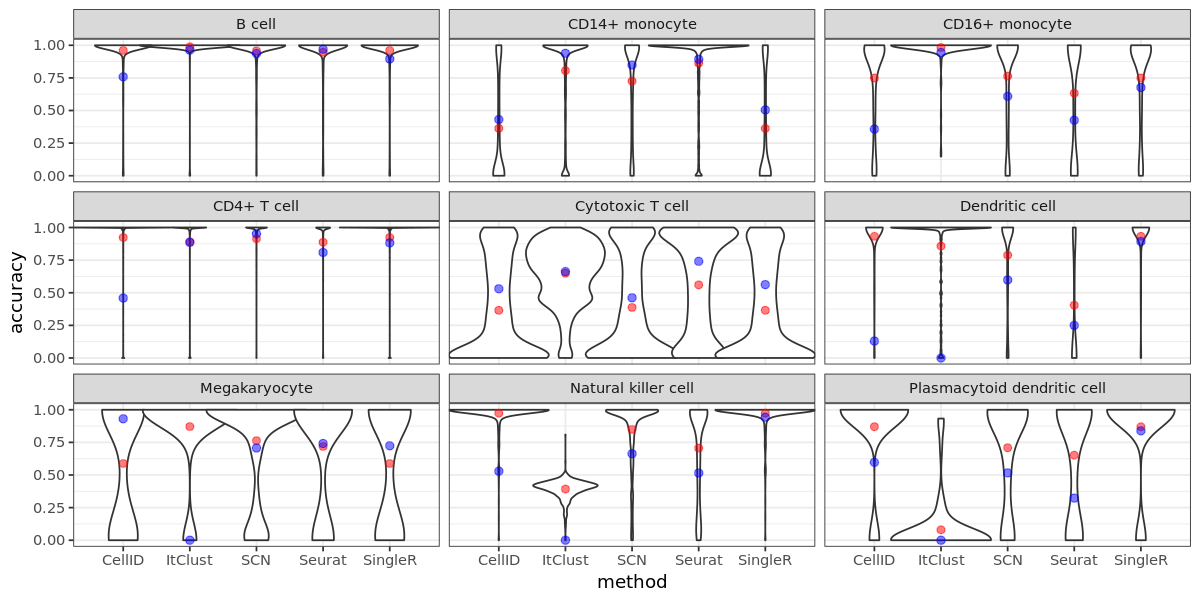

In [12]:
x <- umap@meta.data[, stringr::str_detect(colnames(umap@meta.data), "PBMC10x_100_")]
x <- x[, stringr::str_detect(colnames(x), "confidence", negate = T)]
x <- x[, stringr::str_detect(colnames(x), "bootstrap", negate = T)]
x$id <- umap@meta.data$class_
x <- reshape2::melt(x)

colnames(x) <- c("celltype","method", "accuracy")
x$method <- stringr::str_replace(x$method,"PBMC10x_100_", "")
x$accuracy <- x$accuracy / 100

options(repr.plot.width=10, repr.plot.height=5)
ggplot(x, aes(method, accuracy)) + geom_violin(width=1.5) +  
stat_summary(fun.y=mean, geom="point", shape=20, size=3, color="red", fill="red", alpha=0.5) +
theme_bw()+ facet_wrap(facets = vars(celltype)) +geom_point(data=accuracy, size=2, color="blue", alpha=0.5)

[1] 5

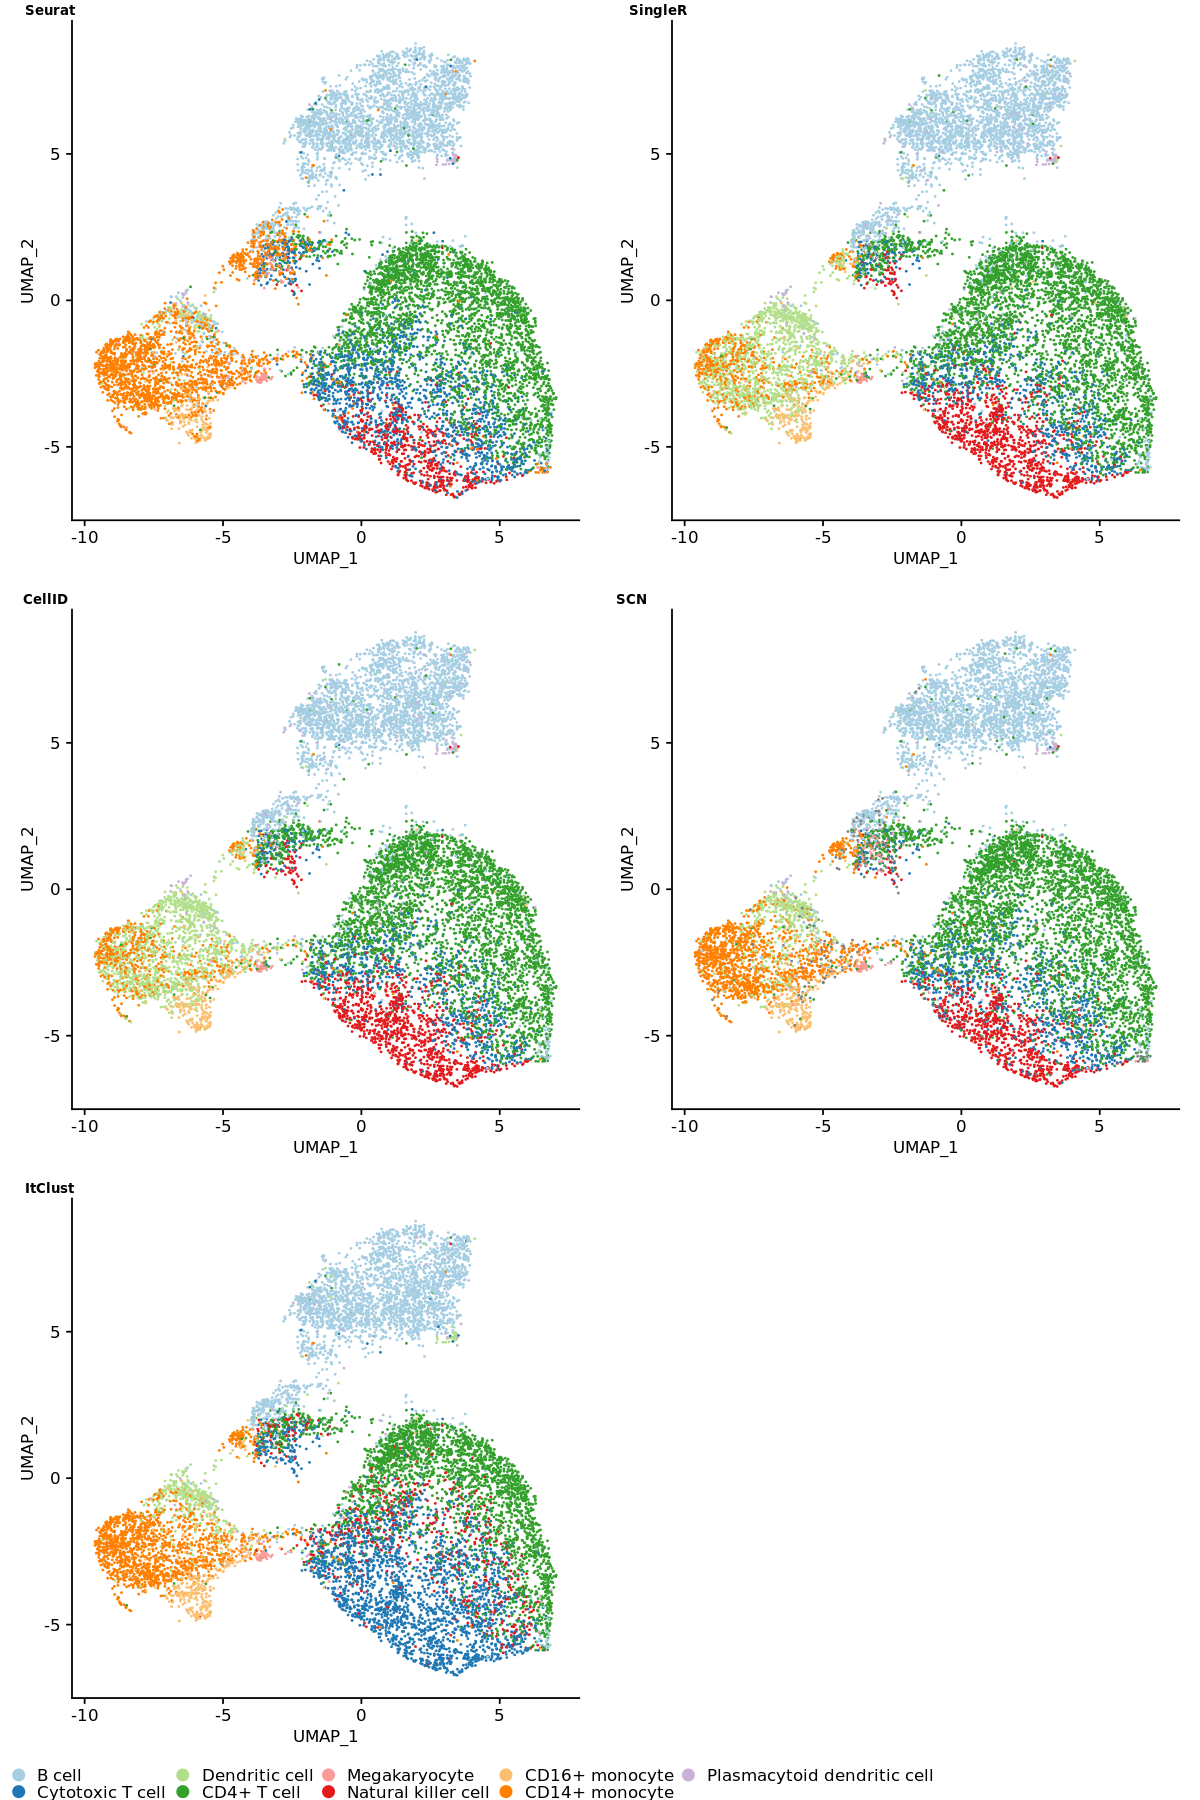

In [13]:
umap@meta.data$PBMC10x_SCN_3090_0[umap@meta.data$PBMC10x_CellID_3090_0 == "unassigned"] <- NA
f3_list <- plot_umap(umap, c(paste0("PBMC10x_100_",methods[methods != "MLP"], "_bootstrap")),NULL,
                           color=colors,
                           1,1, legend_ncol = 5) 
options(repr.plot.width=10, repr.plot.height=15)  
length(plots_full)
f3 <- ggpubr::ggarrange(plotlist = f3_list,labels=methods, font.label = list(size = 8), common.legend = T, legend = "bottom",
                        ncol=2, nrow=3)
f3

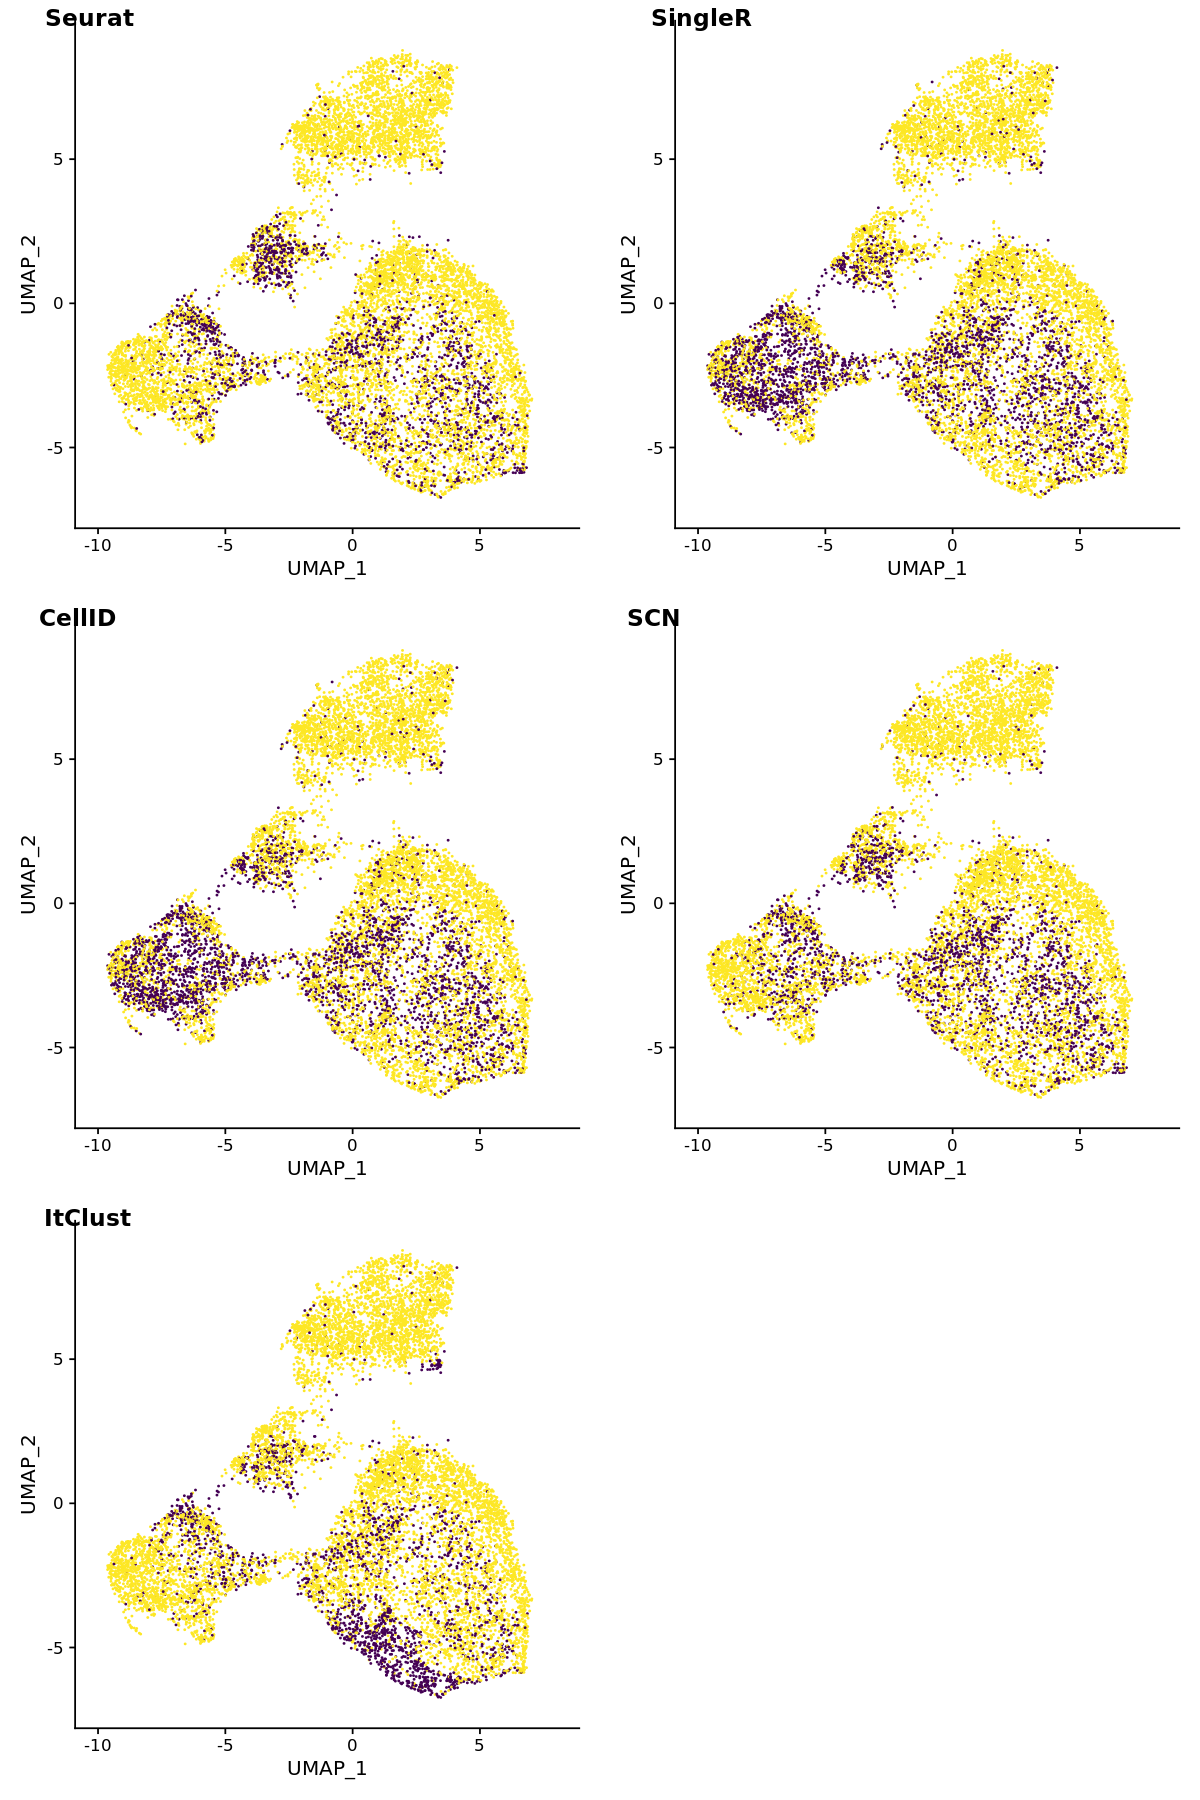

In [17]:
umap@meta.data$bootstrap_Seurat  <- umap@meta.data$PBMC10x_100_Seurat_bootstrap == umap@meta.data$class_
umap@meta.data$bootstrap_CellID  <- umap@meta.data$PBMC10x_100_CellID_bootstrap == umap@meta.data$class_
umap@meta.data$bootstrap_SCN     <- umap@meta.data$PBMC10x_100_SCN_bootstrap == umap@meta.data$class_
umap@meta.data$bootstrap_ItClust <- umap@meta.data$PBMC10x_100_ItClust_bootstrap == umap@meta.data$class_
umap@meta.data$bootstrap_SingleR <- umap@meta.data$PBMC10x_100_SingleR_bootstrap == umap@meta.data$class_

balanced_list <-lapply(methods[methods != "MLP"], function(method) plot_features(data=umap, method=method,cells=NULL,
                                                          # names = c("Biggest balanced sets", "100 cells per celltype", "3000 cells per celltype"),
                                                         sets=c("bootstrap_"), legend=T))
options(repr.plot.width=10, repr.plot.height=15)  

f2c <- ggpubr::ggarrange(plotlist = balanced_list,labels=methods, font.label = list(size =14),
                         common.legend = F, legend = "none", ncol=2, nrow=3)
                       f2c

[1] 1


Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



[1] 1


Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



[1] 1


Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



[1] 1


Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



[1] 1


Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



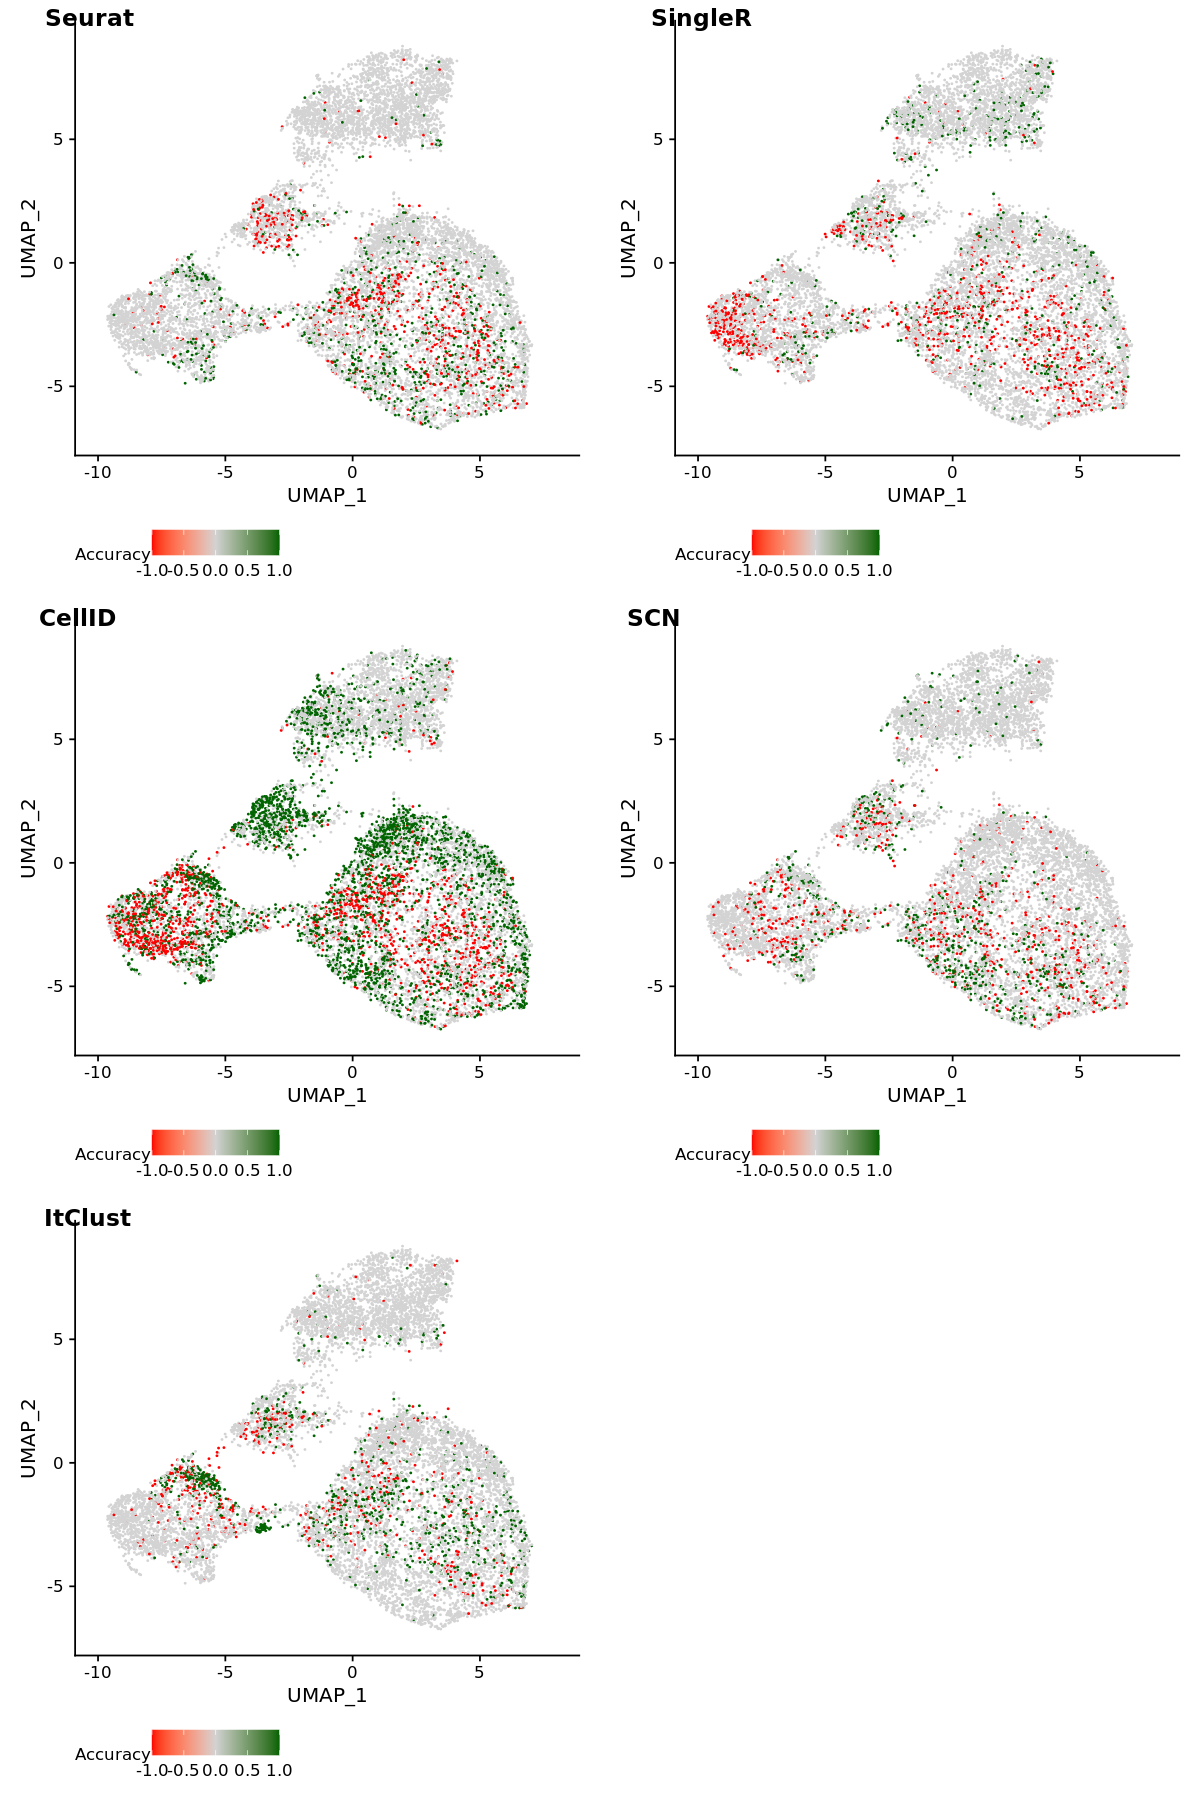

In [29]:
umap@meta.data$dif_Seurat  <- umap@meta.data$bootstrap_Seurat  - umap@meta.data$full_Seurat
umap@meta.data$dif_CellID  <- umap@meta.data$bootstrap_CellID  - umap@meta.data$full_CellID
umap@meta.data$dif_SCN     <- umap@meta.data$bootstrap_SCN     - umap@meta.data$full_SCN
umap@meta.data$dif_ItClust <- umap@meta.data$bootstrap_ItClust - umap@meta.data$full_ItClust
umap@meta.data$dif_SingleR <- umap@meta.data$bootstrap_SingleR - umap@meta.data$full_Single

plot_features <- function(data, method=NULL, cells, sets=NULL, names=NULL,legend="none"){
    
    if(is.null(sets)) stop("At least on set needed")
    len <- length(sets)
    print(len)
    if(!(is.null(names)) & len != length(names)) stop("Names must be the same length as the sets")


        plot <- FeaturePlot(data, reduction="umap", features=paste0(sets[1], method),cells = cells) + 
        labs(color="Accuracy")+ #viridis(101)
        scale_color_gradientn( colours = c('red','lightgrey','darkgreen'),  limits = c(-1, 1))+
                           theme(axis.text=element_text(size=10), axis.title=element_text(size=12),
                                 plot.title = element_text(size=10),
                                 legend.text=element_text(size=10),
                                 legend.title = element_text(size=10)) + ggtitle(names[1])
        return(plot)

}

balanced_list <-lapply(methods[methods != "MLP"], function(method) plot_features(data=umap, method=method,cells=NULL,
                                                          # names = c("Biggest balanced sets", "100 cells per celltype", "3000 cells per celltype"),
                                                         sets=c("dif_"), legend=T))
options(repr.plot.width=10, repr.plot.height=15)  

f2c <- ggpubr::ggarrange(plotlist = balanced_list,labels=methods, font.label = list(size =14),
                         common.legend = F, legend = "bottom", ncol=2, nrow=3)
                       f2c

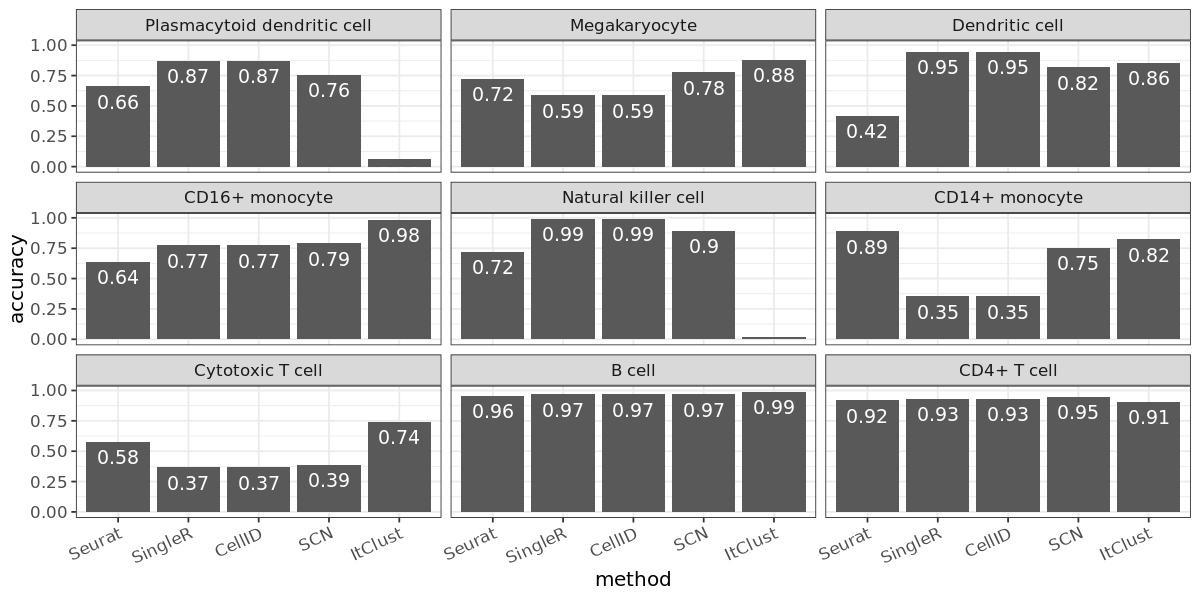

In [38]:
accuracy_bootstrap <-  do.call(rbind,lapply(celltypes, function(type) getAccuracy(umap@meta.data, type=type, id="bootstrap_")))
                                            
rownames(accuracy_bootstrap) <- celltypes
                                            
                                       
accuracy_bootstrap <- reshape2::melt(accuracy_bootstrap)
colnames(accuracy_bootstrap) <- c("celltype", "method", "accuracy")
accuracy_bootstrap$method <- stringr::str_replace(accuracy_bootstrap$method, "bootstrap_","")

                                  options(repr.plot.width=10, repr.plot.height=5)
accuracies_full <- ggplot(accuracy_bootstrap, aes(method, accuracy))+
theme_bw() + geom_bar(stat="identity",position=position_dodge())+
geom_text(aes(label=round(accuracy,2)), vjust=1.6, color="white",
            position = position_dodge(0.9), size=4)+ facet_wrap(facets = vars(celltype), as.table = T)+
 
theme(plot.title = element_text(size=12),
      axis.text=element_text(size=10),
      axis.text.x=element_text(size=10, angle = 25, hjust = 1),
      axis.title=element_text(size=12),
      strip.text = element_text(size=10))+
scale_x_discrete(limits = methods)
accuracies_full

In [39]:
head(accuracy_bootstrap)
head(accuracy)

celltype                    method accuracy 
1 Plasmacytoid dendritic cell Seurat 0.6612903
2 Megakaryocyte               Seurat 0.7241379
3 Dendritic cell              Seurat 0.4196429
4 CD16+ monocyte              Seurat 0.6382979
5 Natural killer cell         Seurat 0.7202296
6 CD14+ monocyte              Seurat 0.8882455

celltype                    method accuracy 
1 Plasmacytoid dendritic cell Seurat 0.3225806
2 Megakaryocyte               Seurat 0.7413793
3 Dendritic cell              Seurat 0.2500000
4 CD16+ monocyte              Seurat 0.4255319
5 Natural killer cell         Seurat 0.5150646
6 CD14+ monocyte              Seurat 0.8928778

In [47]:
x <- merge(accuracy_bootstrap, accuracy, by=c("celltype", "method"))
colnames(x) <- c("celltype", "method", "Bootstrap", "Full")
head(x)

celltype       method  Bootstrap Full     
1 B cell         CellID  0.9681290 0.7581552
2 B cell         ItClust 0.9895013 0.9632546
3 B cell         SCN     0.9692538 0.9370079
4 B cell         Seurat  0.9553806 0.9688789
5 B cell         SingleR 0.9681290 0.8950131
6 CD14+ monocyte CellID  0.3526346 0.4308049

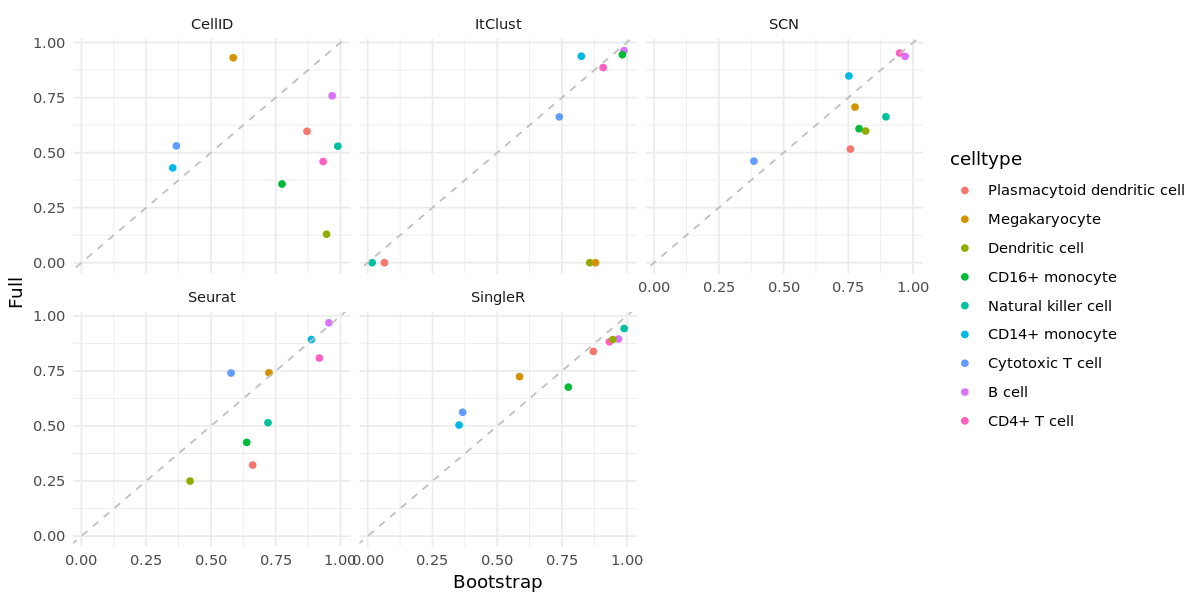

In [51]:
ggplot(x, aes(Bootstrap, Full, color=celltype)) + geom_point()+theme_minimal()+ 
geom_abline(intercept = 0, color="grey", linetype="dashed")+ facet_wrap(facets = vars(method))